# Описание проекта

  
<p>Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<p><b>План работы:</b>
<p>1 Изучить общую информацию
<p>2 Проведисти исследовательский анализ данных
<p>3 Составить портрет пользователя каждого региона
<p>4 Проверить гипотезы: 
<p>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
<p>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Первичное ознакомление с данными

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
from scipy import stats as st
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv('/datasets/games.csv')

df = data.copy()

In [98]:
df.sample(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2486,Tiger Woods PGA Tour 11,PS3,2010.0,Sports,0.37,0.33,0.00,0.13,78.0,6.7,E
12745,Atari's Greatest Hits: Volume 2,DS,2011.0,Misc,0.05,0.00,0.00,0.00,NaN,NaN,NaN
6366,Fire Emblem: Shin Monshou no Nazo Hikari to Ka...,DS,2010.0,Strategy,0.00,0.00,0.27,0.00,NaN,NaN,NaN
3037,The Darkness,PS3,2007.0,Shooter,0.20,0.33,0.00,0.13,80.0,7.7,M
3555,Ms. Pac-Man Maze Madness,GBA,2004.0,Puzzle,0.40,0.15,0.00,0.01,NaN,tbd,E
5230,Watch Dogs 2,XOne,2016.0,Action,0.17,0.16,0.00,0.03,83.0,7.7,M
15918,Exhibition Volume 6,XB,2004.0,Misc,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходные данные состоят из 16715 строк и 11 столбцов, в столбцах имеются пропущенные значения, также, при выборочном просмотре строк, было обнаружено, что в столбце User_Score есть значения "tbd". Данные имеют тип данных float64 и object.

In [100]:
#определим количество пропущенных значений для каждого столбца
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В столбце Name - 2 пропуска, в столбце Year_of_Release - 269, в столбце Genre - 2 пропуска, Critic_Score - 8578 пропусков, User_Score - 6701 (плюс значения "tbd"), в Rating - 6766

# Подготовка данных

In [101]:
#Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

Строки с пропущенным значением года удалим, также как и с пропущенными значениями в столбцах name и genre

In [102]:
#Удалим строки с пропущенными значениями в столбцах 'name', 'year_of_release', 'genre'
df = df.dropna(subset=['name'])
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['genre'])

In [103]:
#Изменим тип данных года релиза на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)

In [104]:
#Рассмотрим уникальные значения в столбце 'user_score' 
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце встречаются как пропуски значений, так и значение tbd - будет определено, это знаечние не позволит нам дальше работать с этим столбцом. Удалять все пропущенные значения нельзя, так как слишком много значений.Тоже самое в столбцах critic_score и rating

In [105]:
#Удалим значение 'tbd'
df.loc[df['user_score']== 'tbd','user_score'] = np.nan
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Для экономии памяти, изменим тип данных  на float32

In [106]:
#Выведем в виде списка названия столбцов
df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [107]:
#Создадим цикл для изменения типа данных с float64 на float32
cols_to = [
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score']

for col in df.columns:
    if col in cols_to:
        df[col] = df[col].astype('float32')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


In [109]:
#Удалим явные дубликаты
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


Явных строк-дубликатов не было обнаружено

In [110]:
#Создадим столбец с общей суммой продаж
df['sale_sum'] = df[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)

# Исследовательский анализ данных

### Изучим, сколько игр выпускалось в разные годы. 

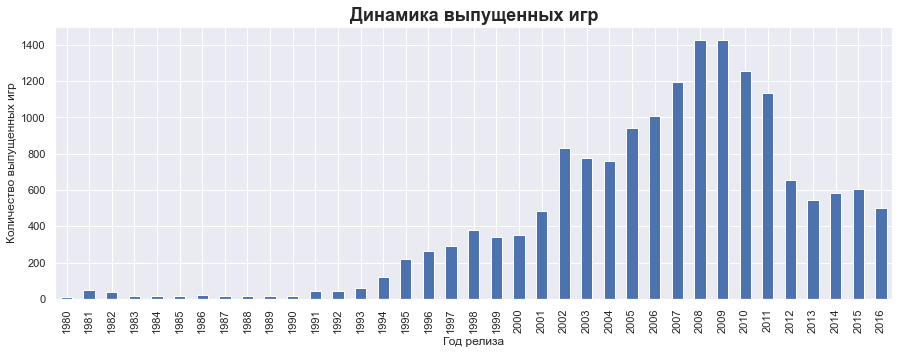

In [111]:
#Построим график количества игр в динаимке  
df.groupby('year_of_release')['name'].count().plot(kind = 'bar',  
                                                   figsize=(15,5),  
                                                   legend=False).set(xlabel='Год релиза', ylabel='Количество выпущенных игр')
plt.title('Динамика выпущенных игр', fontdict= {'fontsize': 18, 'fontweight':'bold'});

Больше всего игр приходится на 2008,2009 гг. Чуть меньше игр выпускалось в 2007 и 2009 годах.

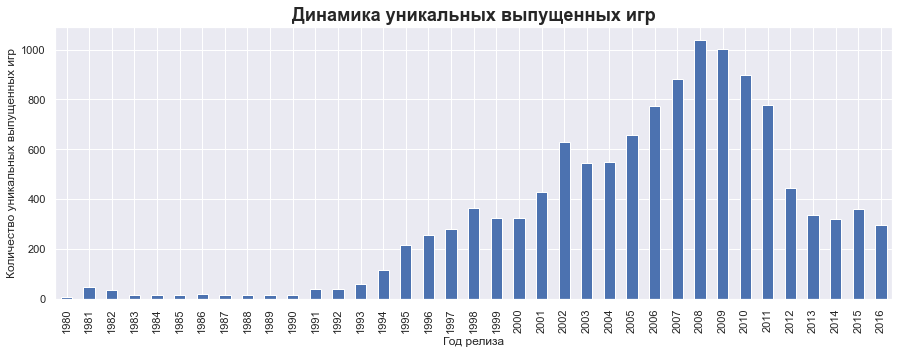

In [112]:
df.groupby('year_of_release')['name'].nunique().plot(kind = 'bar',  
                                                   figsize=(15,5), 
                                                   legend=False).set(xlabel='Год релиза', ylabel='Количество уникальных выпущенных игр')
plt.title('Динамика уникальных выпущенных игр', fontdict= {'fontsize': 18, 'fontweight':'bold'});

Количество выпущенных уникальных игр приведено на рисунке

Рассмотрим динамику продаж в разрезе регионов

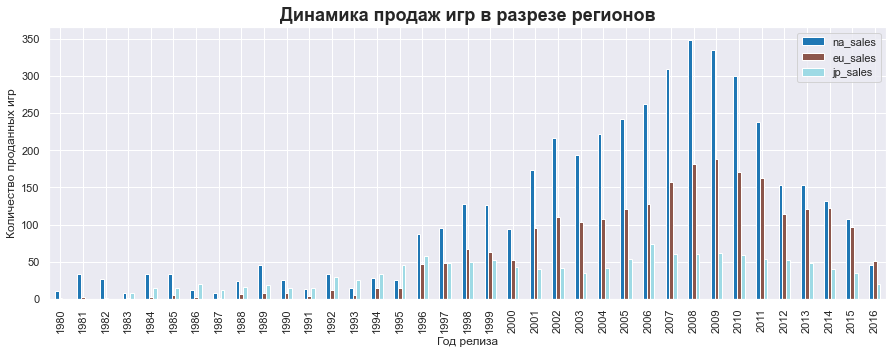

In [113]:
df.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales']].sum().plot(kind = 'bar', 
                                                                               figsize=(15,5), 
                                                                               cmap='tab20').set(xlabel='Год релиза', ylabel='Количество проданных игр')
plt.title('Динамика продаж игр в разрезе регионов', fontdict= {'fontsize': 18, 'fontweight':'bold'});

Хорошо видно, что самое большое количество продаж в Северной Америке, на втором месте - Европа, в Японии самый маленький. При этом, в Европе и Японии объем продаж более стабильный, чем в Северной Америке (после 2011 года наблюдается резкий спад продаж). В целом, прослеживается схожая тенденция между годом продаж и регионом, за исключением Японии в период с 2001 по 2005: в Америке и Европе рост, а в Японии спад.

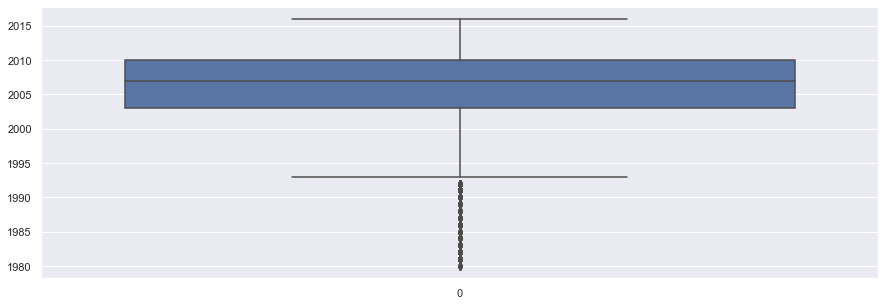

In [114]:
#Построим бксплот, чтобы орпеделить какие года можно считать выбросами 
sns.boxplot(data = df['year_of_release']);

На графике видно, что для анализа брать данные раньше 1994 года смысла нет. Половина общего количества игр было выпущено в период 2002 - 2011 гг.

In [115]:
#отбросим значения, которые соответствуют году ранее 1994, исходный датафрейм сохраним
dfn = df.copy()
dfn = dfn.loc[dfn['year_of_release']>1994]

### Изучим динамику игр по платформам

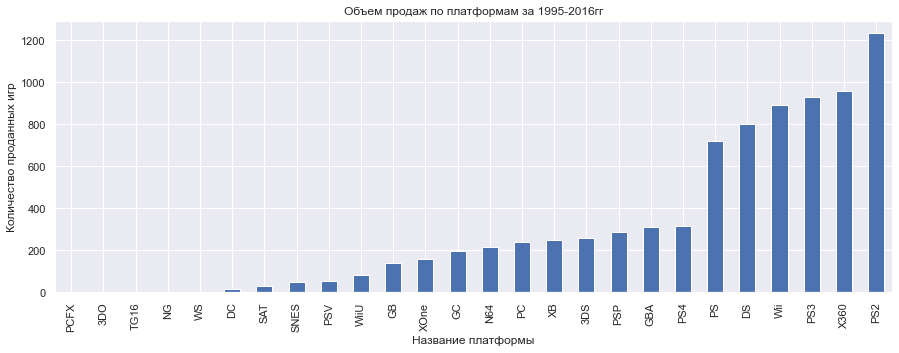

In [116]:
#Построим гистограмму: платформа - общая продажа (c 1994 года)
dfn.groupby('platform')['sale_sum'].sum().sort_values().plot(kind = 'bar', 
                                                             figsize = (15,5),
                                                             title = 'Объем продаж по платформам за 1995-2016гг').set(xlabel='Название платформы', 
                                                                                                                        ylabel='Количество проданных игр');

Больше всего продаж игр было для платформы PS2, также большое количество - на платформах X360, PS3, Wii, DS, PS. На остальных платформах сумма продаж существенно ниже.Таким образом,  эти платформы являются лидерами, среди других платформ. Рассмотрим ТОП-10 платформ.

In [117]:
#Определим названия платформ, входящие в ТОП-10
name_top_10 = list(dfn.groupby('platform')['sale_sum'].sum().sort_values(ascending = False).head(10).reset_index()['platform'])

In [118]:
#Сделаем срез по ТОП-10 платформ
df_name_top_10 = dfn.loc[dfn['platform'].isin(name_top_10)]

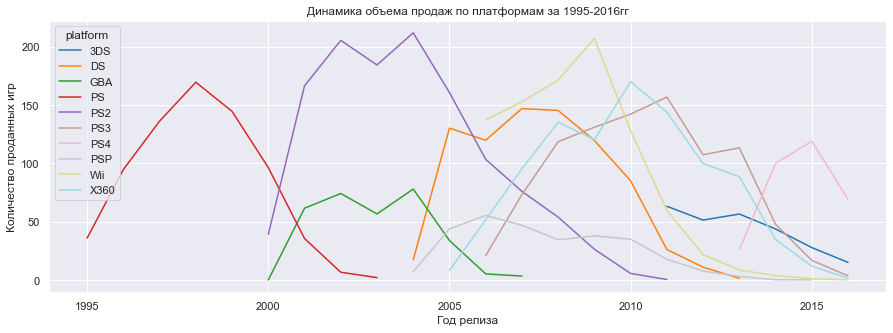

In [119]:
#Построим графики продаж по ТОП-10 платформах
df_name_top_10.pivot_table(index = 'year_of_release', 
                   columns = 'platform', 
                   values = 'sale_sum', 
                   aggfunc = 'sum').plot(figsize = (15,5), 
                                         cmap='tab20', 
                                         title = 'Динамика объема продаж по платформам за 1995-2016гг').set(xlabel='Год релиза', 
                                                                                                 ylabel='Количество проданных игр');

На графике хорошо видно, что жизненный цикл платформы составляет около 10 лет. Платформа Wii имеет очень резкий спад продаж, относительно других платформ. Надо отметить, что при спаде продаж одной платформы, увеличиваются продажи игр для другой платформы (пересечение графиков спада и роста). Также хорошо видно, что в период с 2005 по 2012 года одновременно наблюдается рост объема продаж игр на нескольких платформах.

 Мы определили, что в среднем, жизненный цикл платформы составляет около 10 лет, таким образом, потенциально прибыльными платформами можно считать платформы, которые "живы" последние 5 лет (половина жизненного цикла), так как хоть пик популярности их прошел, они еще остаются востребованными. И так как это очень быстроменяющаяся сфера, для анализа оставим данные, начиная с 2014 года. Также необходимо отметить, что платформы PS4 и 3DS являются самымыми молодыми платформами, т.е. они еще не успели набрать популярность и обрести большой объем продаж.

In [120]:
#Отфильтруем датафрейм по данным больше 2014 года 
df_new = df.loc[df['year_of_release']>=2014]

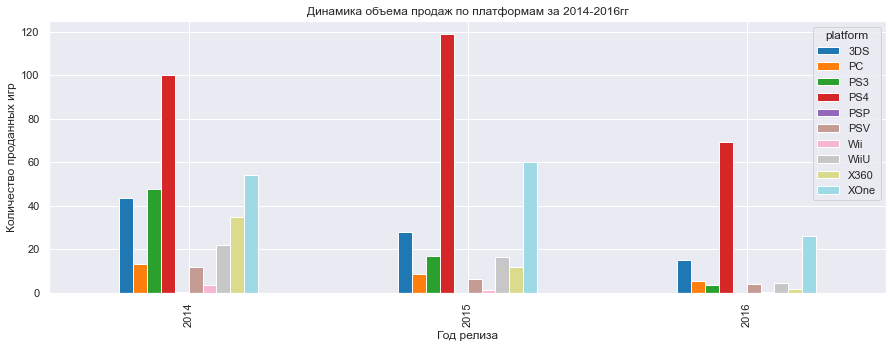

In [121]:
#Построим гистограмму объема продаж после 2014 года для каждой из платформы по годам
df_new.pivot_table(index='year_of_release', 
                      columns='platform', 
                      values = 'sale_sum', 
                      aggfunc = 'sum' ).plot(kind = 'bar', 
                                             figsize = (15,5), 
                                             cmap='tab20', 
                                             grid = True,
                                             title = 'Динамика объема продаж по платформам за 2014-2016гг').set(xlabel='Год релиза', 
                                                                                                 ylabel='Количество проданных игр');

На графике хорошо видно, что основными конкурентами в 2014 году были: PS4, XOne, PS3 и 3DS; в 2015и 2016 годах - PS4 и XOne; Также хорошо видно, что на смену одной платформы одного производителя приходит другая (PS3-PS4, X360-XOne). Хорошо видно, что только PS4 и XOne являются наиболее жизнеспособными платформами, жизненный цикл всех остальных подошел к концу. Платформа 3DS еще жива, но объем продаж гораздо ниже и ее жизненный цикл подходит также к концу. 

In [122]:
#Сделаем срез данных по потенциально прибыльным платформам
df_new_potential_platform = df_new.loc[(df_new['platform']== 'PS4')|
                                     (df_new['platform']== 'XOne')]

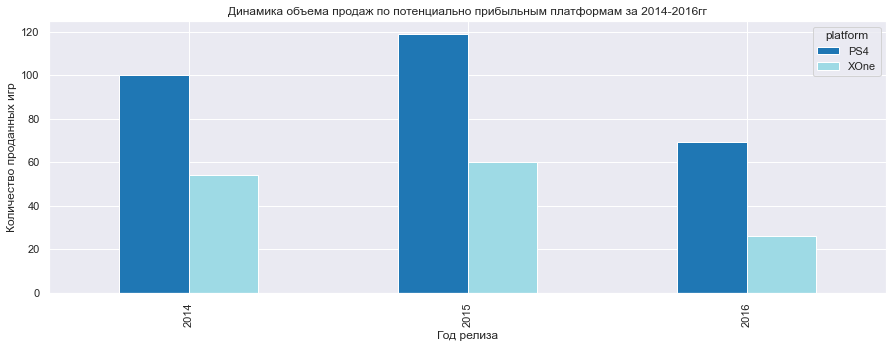

In [123]:
#Построим гистограмму объема продаж после 2014 года для каждой из потенциально прибыльной платформы по годам
df_new_potential_platform.pivot_table(index='year_of_release', 
                                      columns='platform', 
                                      values = 'sale_sum', 
                                      aggfunc = 'sum').plot(kind = 'bar', 
                                                            figsize = (15,5), 
                                                            cmap='tab20', 
                                                            grid = True, 
                                                            title = 'Динамика объема продаж по потенциально прибыльным платформам за 2014-2016гг').set(xlabel='Год релиза', 
                                                                                                 ylabel='Количество проданных игр');

In [124]:
#Определим общий объем продаж по каждой из потенциально прибыльной платформы
df_new_potential_platform.groupby('platform')['sale_sum'].sum().sort_values(ascending = False)

platform
PS4     288.149994
XOne    140.360001
Name: sale_sum, dtype: float32

Объем продаж игр на платформе Xone гораздо ниже, чем на платформе PS4, ввиду чего, можно говорить, что при выборе платформы, приоритет стоит отдать именно ей.

### Рассмотрим потенциально прибыльные платформы более детально

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

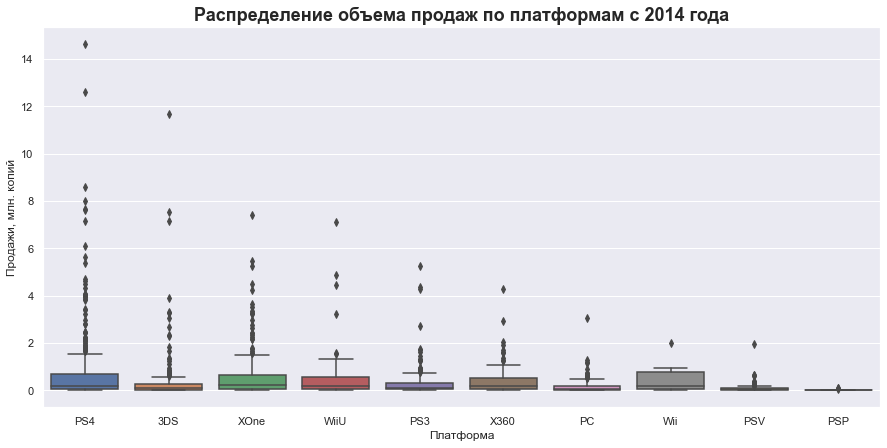

In [125]:
sns.set(rc={'figure.figsize':(15,7)})
pt = sns.boxplot(data=df_new, x='platform', y='sale_sum')
pt.set_title('Распределение объема продаж по платформам c 2014 года',fontdict= {'fontsize': 18, 'fontweight':'bold'})
pt.set(xlabel='Платформа', ylabel='Продажи, млн. копий');

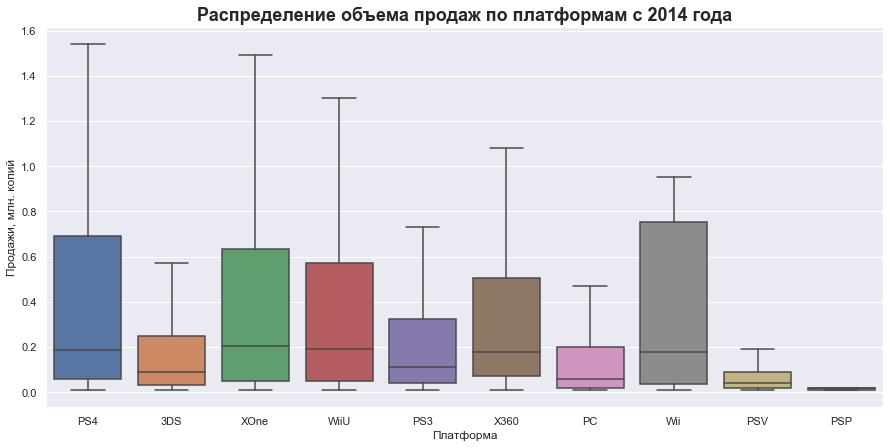

In [126]:
#Построим график с усами без выбросов, для более детального рассмотрения 
sns.set(rc={'figure.figsize':(15,7)})
pt = sns.boxplot(data=df_new, x='platform', y='sale_sum', showfliers=False)
pt.set_title('Распределение объема продаж по платформам c 2014 года',fontdict= {'fontsize': 18, 'fontweight':'bold'})
pt.set(xlabel='Платформа', ylabel='Продажи, млн. копий');

Наибольший разброс значений на платформе PS4. При этом, на данной платформе самое большое максимальное значение объема продаж. Также по объему продаж выделяются платформы: XOne, Wii, WiiU, X360. Медианное значение у XOne выше, чем у других платформ.На всех платформах медианное значение меньше среднего значения (медиана смещена вниз).Это говорит о том, что много игр, которые почти не принесли прибыль, а также есть отдельные игры, которые обеспечили большой объем продаж.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для анализа возьмем платформу X360.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


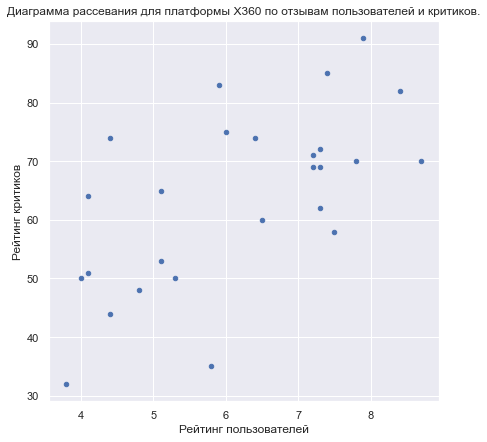

In [127]:
#Отфильтруем значения для платформы X360
x_360 = df_new.query ('platform=="X360"')                      
# Постороим даграмму рассеивания для платформы X360 по отзывам пользователей и критиков.
x_360.plot(x = 'user_score', 
           y = 'critic_score', 
           kind = 'scatter', figsize = (7,7),
           title = 'Диаграмма рассевания для платформы X360 по отзывам пользователей и критиков.').set(xlabel='Рейтинг пользователей', 
                                                                                                 ylabel='Рейтинг критиков');

На рисунке видно, что связь между отзывами пользователей и критиков имеется

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


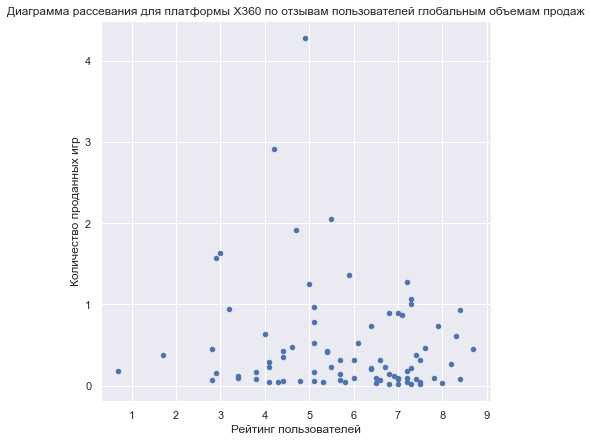

In [128]:
# Постороим даграмму рассеивания для платформы X360 по отзывам пользователей глобальным объемам продаж.
x_360.plot(x = 'user_score',
          y = 'sale_sum',
          kind = 'scatter', figsize = (7,7),
          title = 'Диаграмма рассевания для платформы X360 по отзывам пользователей глобальным объемам продаж').set(xlabel='Рейтинг пользователей', 
                                                                                                 ylabel='Количество проданных игр');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


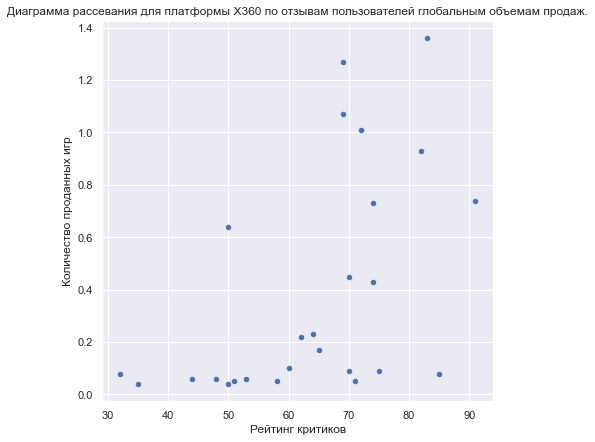

In [129]:
# Постороим даграмму рассеивания для платформы X360 по отзывам пользователей глобальным объемам продаж.
x_360.plot(x = 'critic_score',
          y = 'sale_sum',
          kind = 'scatter',  figsize = (7,7),
          title = 'Диаграмма рассевания для платформы X360 по отзывам пользователей глобальным объемам продаж.').set(xlabel='Рейтинг критиков', 
                                                                                                 ylabel='Количество проданных игр');

In [130]:
#Построим корреляционную матрицу по общему объему продаж, объему продаж по регионам, отзывам критиков и пользователей
corr_matrix_x_360 = x_360[['critic_score', 'user_score', 'sale_sum', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr_matrix_x_360.round(2).style.background_gradient('PRGn')

,critic_score,user_score,sale_sum,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.630000,0.530000,0.540000,0.440000,0.440000
user_score,0.630000,1.000000,-0.140000,-0.130000,-0.110000,0.090000
sale_sum,0.530000,-0.140000,1.000000,0.940000,0.820000,0.150000
na_sales,0.540000,-0.130000,0.940000,1.000000,0.590000,0.150000
eu_sales,0.440000,-0.110000,0.820000,0.590000,1.000000,0.090000
jp_sales,0.440000,0.090000,0.150000,0.150000,0.090000,1.000000


Как уже отмечалось ранее, наиболее сильная связь имеется между отзывами пользователей и отзывами критиков (коэффициент Пирсона равен 0.625309. Свзь между объемом продаж и отзывами критиков слабее (коэффициент равен 0.525723), зависимости между объемами продаж и отзывами пользователей нет. Это говорит о том, что вкусы и игровые предпочтения у жителей сильно отличаются. Это подтверждается коэффициентами корреляции между объемами продаж и отзывами пользователей по регионам. Отзывы критиков более объективные.

In [131]:
#Сделаем срезы для потенциально прибыльных платформ:
x_one = df_new.loc[df_new['platform']=='XOne']
ps_4 =  df_new.loc[df_new['platform']=='PS4']

In [132]:
#Построим корреляционную матрицу для платформы XOne
corr_matrix_x_one = x_one[['critic_score', 'user_score', 'sale_sum','na_sales', 'eu_sales', 'jp_sales']].corr()
corr_matrix_x_one.round(2).style.background_gradient('PRGn')

,critic_score,user_score,sale_sum,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.440000,0.430000,0.400000,0.390000,0.210000
user_score,0.440000,1.000000,-0.070000,-0.070000,-0.060000,0.060000
sale_sum,0.430000,-0.070000,1.000000,0.970000,0.900000,0.460000
na_sales,0.400000,-0.070000,0.970000,1.000000,0.760000,0.440000
eu_sales,0.390000,-0.060000,0.900000,0.760000,1.000000,0.420000
jp_sales,0.210000,0.060000,0.460000,0.440000,0.420000,1.000000


По платформе XOne: коэффициент Пирсона между отзывами пользователей и отзывами критиков меньше, но также прослеживается слабая связь (0.4410), также имеется слабая связь отзывами критиков и глобальными продажами (0.4287), продажами в америке (0.4011), продажами в Европе (0.3851). зависимости между отзывами критиков и продажами в Японии не наблюдается

In [133]:
#Построим корреляционную матрицу для платформы PS4
corr_matrix_ps_4 = ps_4[['critic_score', 'user_score', 'sale_sum','na_sales', 'eu_sales', 'jp_sales']].corr()
corr_matrix_ps_4.round(2).style.background_gradient('PRGn')

,critic_score,user_score,sale_sum,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.550000,0.400000,0.410000,0.340000,0.380000
user_score,0.550000,1.000000,-0.040000,-0.020000,-0.060000,0.180000
sale_sum,0.400000,-0.040000,1.000000,0.930000,0.960000,0.540000
na_sales,0.410000,-0.020000,0.930000,1.000000,0.780000,0.490000
eu_sales,0.340000,-0.060000,0.960000,0.780000,1.000000,0.470000
jp_sales,0.380000,0.180000,0.540000,0.490000,0.470000,1.000000


По платформе PS4: коэффициент Пирсона между отзывами пользователей и отзывами критиков составляет 0.5464, имеется слабая связь между отзывами критиков и общими продажами (0.4027), продажами в Америке (0.4116), продажами в Европе (0.3403), продажами в Японии (0.3790).

In [134]:
#Построим корреляционную матрицу для всех платформ по параметрам: объем продаж, отзывы пользователей и критиков
corr_matrix_top = df_name_top_10[['critic_score', 'user_score', 'sale_sum']].corr()
corr_matrix_top.round(2).style.background_gradient('PRGn')

,critic_score,user_score,sale_sum
critic_score,1.000000,0.600000,0.280000
user_score,0.600000,1.000000,0.100000
sale_sum,0.280000,0.100000,1.000000


Корреляционная матрица по ТОП-10 платформ подтверждает вышеприведенные выводы

### Исследуем приоритетность игр по жанрам

Рассмотрим количество игр в разных жанрах, начиная с 2014 года включительно

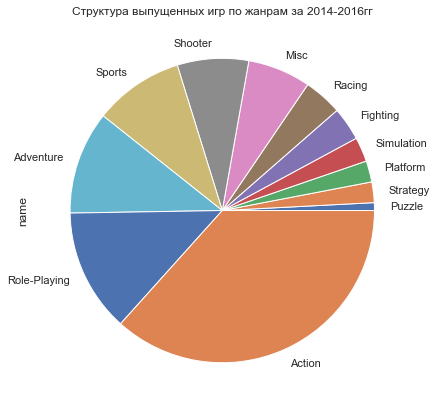

In [135]:
#Построим график количества игр в в зависимости от жанра игры, начиная с 2014 года 
df_new.groupby('genre')['name'].count().sort_values().plot(kind = 'pie', 
                                                           title = 'Структура выпущенных игр по жанрам за 2014-2016гг',
                                                            figsize = (7,7));

In [136]:
df_new.groupby('genre')['name'].count().sort_values(ascending = False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

За анализируемый период больше всего игр было выпущено в жанрах: Action, Role-Playing, Adventure,  Sports и Shooter, меньше всего - в жанрах Strategy и Puzzle.

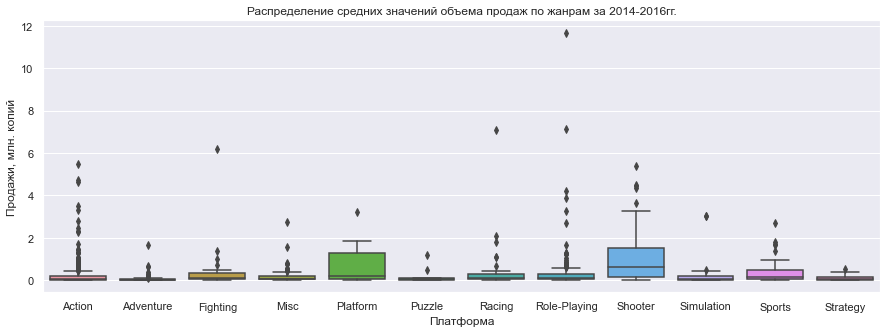

In [137]:
sns.set(rc={'figure.figsize':(15,5)})
s = sns.boxplot(data = df_new.pivot_table(index = 'name', 
                                           columns = 'genre', 
                                           values = 'sale_sum', 
                                           aggfunc = 'median'))
s.set_title('Распределение средних значений объема продаж по жанрам за 2014-2016гг.')
s.set(xlabel='Платформа', ylabel='Продажи, млн. копий');

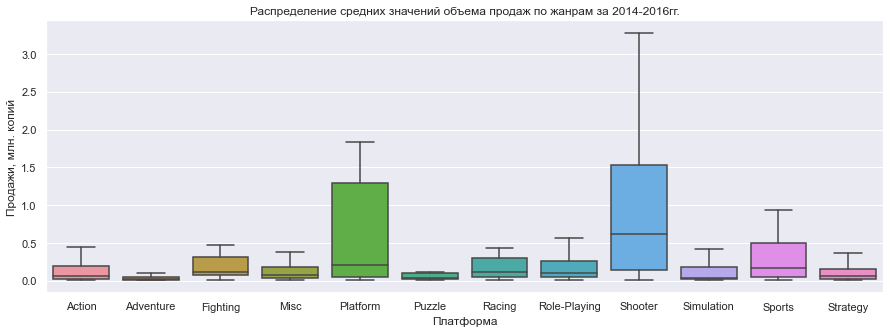

In [138]:
#Построим боксплот ьез выбросов, для более детального рассмотрения
sns.set(rc={'figure.figsize':(15,5)})
s = sns.boxplot(data = df_new.pivot_table(index = 'name', 
                                           columns = 'genre', 
                                           values = 'sale_sum', 
                                           aggfunc = 'median'), showfliers=False)
s.set_title('Распределение средних значений объема продаж по жанрам за 2014-2016гг.')
s.set(xlabel='Платформа', ylabel='Продажи, млн. копий');

На рисунке хорошо видно, что, несмотря на то, что по общим продажам, жанры Action, Role-Playing, Adventure лидируют, при рассмотрении медианных значений, мы установили, что в этих жанрах выпущено очень большое количество различных игр. А вот жанр Shooter имеет самую большую медиану значений и самый большой "ящик" - половина выпущенных игр в этом жанре пользуются популярностью. Интерес представляет также жанр Platform - несмотря на то, что он не является жанром-лидером, среди проданных копий, большая часть из выпущенных игр пользуюется популярностью у населения.  

In [139]:
#Определим средний рейтинг пользователя, чтобы использовать для выбора наиболее предпочтительных игр
df_new['user_score'].mean()

6.623531818389893

In [140]:
#Сделаем срезы по интересующим нас жанрам и рейтингу пользователя больше 6
action = df_new.query('genre=="Action" & user_score>6')
role = df_new.query('genre=="Role-Playing" & user_score>6')
sports = df_new.query('genre=="Sports" & user_score>6')
shooter = df_new.query('genre=="Shooter" & user_score>6')
platform = df_new.query('genre=="Platform" & user_score>6')

In [141]:
genre_list = (action, role, sports, shooter, platform)

In [142]:
games_potencial = []

In [143]:
#Рассмотрим игры, наиболее популярные в каждом из интересующих нас жанрах
for i in genre_list:
    q = i['genre'].reset_index().loc[1,'genre']
    print(f'Наиболее продаваемые игры в жанре {q}:')
    g = list(i.groupby('name')['sale_sum'].sum().sort_values(ascending=False).head().reset_index()['name'])
    games_potencial.append(g)
    print(', '.join(g))
    print()

Наиболее продаваемые игры в жанре Action:
Grand Theft Auto V, Batman: Arkham Knight, Metal Gear Solid V: The Phantom Pain, LEGO Jurassic World, Assassin's Creed Syndicate

Наиболее продаваемые игры в жанре Role-Playing:
Fallout 4, The Witcher 3: Wild Hunt, Monster Hunter 4 Ultimate, Dragon Age: Inquisition, Dark Souls II

Наиболее продаваемые игры в жанре Sports:
NBA 2K16, NBA 2K15, Madden NFL 15, NBA 2K17, Madden NFL 16

Наиболее продаваемые игры в жанре Shooter:
Far Cry 4, Battlefield 1, Tom Clancy's The Division, Destiny, Uncharted 4: A Thief's End

Наиболее продаваемые игры в жанре Platform:
Super Mario Maker, LittleBigPlanet 3, Kirby: Triple Deluxe, Donkey Kong Country: Tropical Freeze, Rayman Legends



При планировании закупок на 2017 год, следует уделить особое внимание следующим играм: 
<p>в жанре <b>Action</b>: Grand Theft Auto V, Batman: Arkham Knight, Metal Gear Solid V: The Phantom Pain, LEGO Jurassic World, Assassin's Creed Syndicate;
<p>в жанре <b>Role-Playing:</b> Fallout 4, The Witcher 3: Wild Hunt, Monster Hunter 4 Ultimate, Dragon Age: Inquisition, Dark Souls II;
<p>в жанре <b>Sports:</b> NBA 2K16, NBA 2K15, Madden NFL 15, NBA 2K17, Madden NFL 16;
<p>в жанре <b>Shooter:</b> Far Cry 4, Battlefield 1, Tom Clancy's The Division, Destiny, Uncharted 4: A Thief's End;
<p>в жанре <b>Platform:</b> Super Mario Maker, LittleBigPlanet 3, Kirby: Triple Deluxe, Donkey Kong Country: Tropical Freeze, Rayman Legends.    

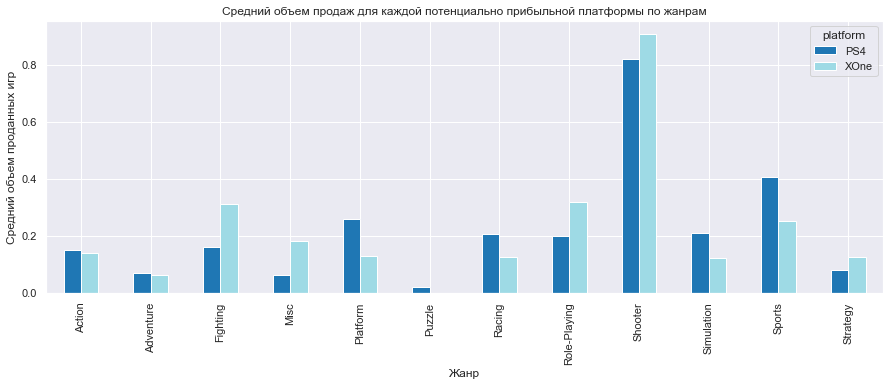

In [144]:
#Построим гистограмму объема продаж после 2014 года для каждой потенциально прибыльной платформы по жанру игры
df_new_potential_platform.pivot_table(index='genre', 
                                         columns='platform', 
                                         values = 'sale_sum', 
                                         aggfunc = 'median' ).plot(kind = 'bar', 
                                                                 figsize = (15,5), 
                                                                 cmap='tab20', 
                                                                 title = 'Средний объем продаж для каждой потенциально прибыльной платформы по жанрам').set(xlabel='Жанр', 
                                                                                                 ylabel='Средний объем проданных игр');

Так как объемы продаж по жанрам различаются, то при выборе игр, надо это учитывать, так как ради новой игры, пользователь не будет покупать новую платформу

In [145]:
#Сделаем срезы по интересующим нас жанрам и платформам
action_p = action.query('platform == "PS4"')
role_p = role.query('platform =="XOne"')
sports_p = sports.query('platform =="PS4"')
shooter_p = shooter.query('platform =="XOne"')
platform_p = platform.query('platform =="PS4"')

In [146]:
genre_platform_list = (action_p, role_p, sports_p, shooter_p, platform_p)

In [147]:
#Рассмотрим игры, наиболее популярные в каждом из интересующих нас жанрах и более популярной платформы
for i in genre_platform_list:
    q = i['genre'].reset_index().loc[1,'genre']
    print(f'Наиболее популярные игры в зависимости от приоритетной платформы в жанре {q}:')
    g = list(i.groupby('name')['sale_sum'].sum().sort_values(ascending=False).head().reset_index()['name'])
    games_potencial.append(g)
    print(', '.join(g))
    print()

Наиболее популярные игры в зависимости от приоритетной платформы в жанре Action:
Grand Theft Auto V, Uncharted: The Nathan Drake Collection, Watch Dogs, Batman: Arkham Knight, Metal Gear Solid V: The Phantom Pain

Наиболее популярные игры в зависимости от приоритетной платформы в жанре Role-Playing:
Fallout 4, The Witcher 3: Wild Hunt, The Elder Scrolls Online, Dragon Age: Inquisition, Dark Souls III

Наиболее популярные игры в зависимости от приоритетной платформы в жанре Sports:
NBA 2K16, NBA 2K15, Madden NFL 15, NBA 2K17, WWE 2K16

Наиболее популярные игры в зависимости от приоритетной платформы в жанре Shooter:
Halo 5: Guardians, Gears of War: Ultimate Edition, Halo: The Master Chief Collection, Titanfall, Battlefield 1

Наиболее популярные игры в зависимости от приоритетной платформы в жанре Platform:
LittleBigPlanet 3, Rayman Legends, Tearaway Unfolded, Mega Man Legacy Collection, Shovel Knight



In [148]:
#Создадим цикл, преобразующий список списков в общий список и оставим уникальные значения
s=[]
for x in games_potencial:
    q = ' '.join(x)
    s.append(q)
s = set(s)

In [149]:

print(f' Наиболее перспективные игры: {s}')

 Наиболее перспективные игры: {'Fallout 4 The Witcher 3: Wild Hunt The Elder Scrolls Online Dragon Age: Inquisition Dark Souls III', 'Fallout 4 The Witcher 3: Wild Hunt Monster Hunter 4 Ultimate Dragon Age: Inquisition Dark Souls II', "Far Cry 4 Battlefield 1 Tom Clancy's The Division Destiny Uncharted 4: A Thief's End", 'NBA 2K16 NBA 2K15 Madden NFL 15 NBA 2K17 Madden NFL 16', 'Grand Theft Auto V Uncharted: The Nathan Drake Collection Watch Dogs Batman: Arkham Knight Metal Gear Solid V: The Phantom Pain', 'NBA 2K16 NBA 2K15 Madden NFL 15 NBA 2K17 WWE 2K16', "Grand Theft Auto V Batman: Arkham Knight Metal Gear Solid V: The Phantom Pain LEGO Jurassic World Assassin's Creed Syndicate", 'Super Mario Maker LittleBigPlanet 3 Kirby: Triple Deluxe Donkey Kong Country: Tropical Freeze Rayman Legends', 'Halo 5: Guardians Gears of War: Ultimate Edition Halo: The Master Chief Collection Titanfall Battlefield 1', 'LittleBigPlanet 3 Rayman Legends Tearaway Unfolded Mega Man Legacy Collection Shovel

### Исследуем предпочтения пользователей каждого региона (NA, EU, JP)

#### Северная Америка

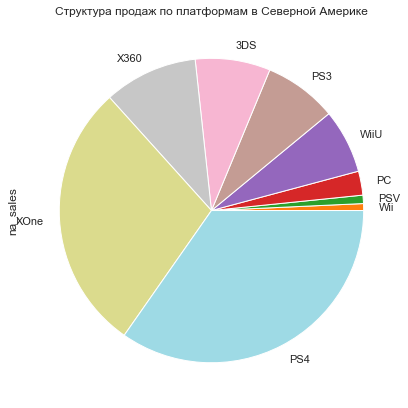

In [150]:
#Построим гистограмму количества проданных игр в Северной Америке в зависимости от платформы после 2014 года
df_new.groupby('platform')['na_sales'].sum().sort_values().plot(kind = 'pie',  
                                                             title = 'Структура продаж по платформам в Северной Америке',
                                                             cmap='tab20', figsize = (7,7));

ТОП-5 Платформ в Северной Америке:  PS4, XOne, X360, 3DS, PS3

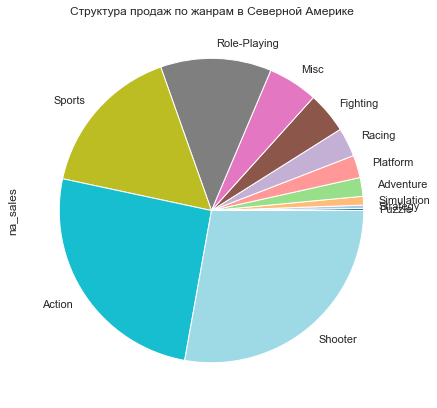

In [151]:
#Построим график количества проданных игр в Северной Америке в зависимости от жанра после 2014 года
df_new.groupby('genre')['na_sales'].sum().sort_values().plot(kind = 'pie',  
                                                             title = 'Структура продаж по жанрам в Северной Америке',
                                                             cmap='tab20', figsize = (7,7));

ТОП-5 жанров в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc 

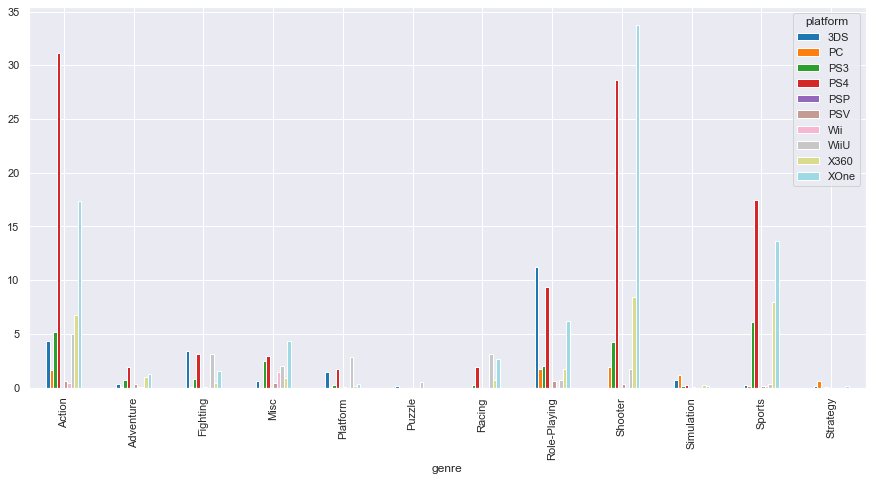

In [152]:
#Построим гистограмму объема продаж после 2014 года для каждой платформы по жанру игры в Северной Америке
df_new.pivot_table(index='genre', 
                    columns='platform', 
                    values = 'na_sales', 
                    aggfunc = 'sum' ).plot(kind = 'bar', figsize = (15,7), cmap='tab20');

Самыми популярными жанрами в Северной Америке являются: Action(на платформах PS4 и XOne), Shooter (на платформах PS4 и XOne), Sports (на платформах PS4 и XOne), чуть менее поопулярны Role-Playing (на платформах 3DS, PS4 и XOne). 

#### Европа

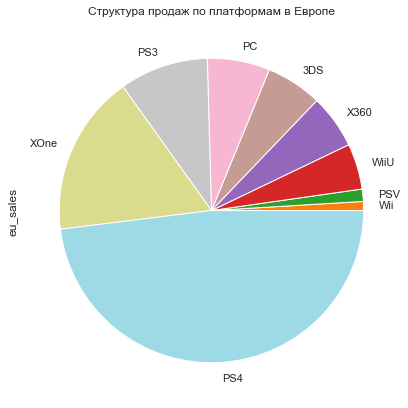

In [153]:
#Построим гистограмму количества проданных игр в Европе в зависимости от платформы после 2014 года
df_new.groupby('platform')['eu_sales'].sum().sort_values().plot(kind = 'pie',  
                                                             title = 'Структура продаж по платформам в Европе',
                                                            cmap='tab20',figsize = (7,7));

ТОП-5 платформ в Европе: PS4, XOne, PS3, PC, 3DS. Видим, что существенного отличия от Северной Америки нет 

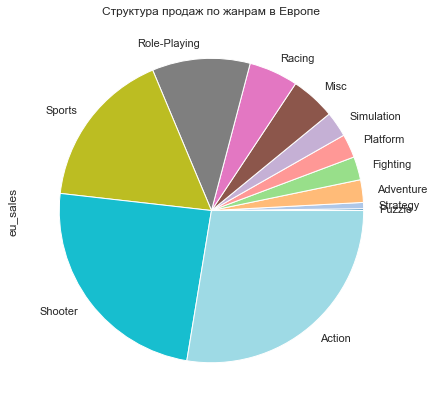

In [154]:
#Построим график количества проданных игр в Европе в зависимости от жанра после 2014 года
df_new.groupby('genre')['eu_sales'].sum().sort_values().plot(kind = 'pie', 
                                                             title = 'Структура продаж по жанрам в Европе',
                                                             cmap='tab20', figsize = (7,7));

ТОП-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing. Топ не отличается от жанров в Северной Америке 

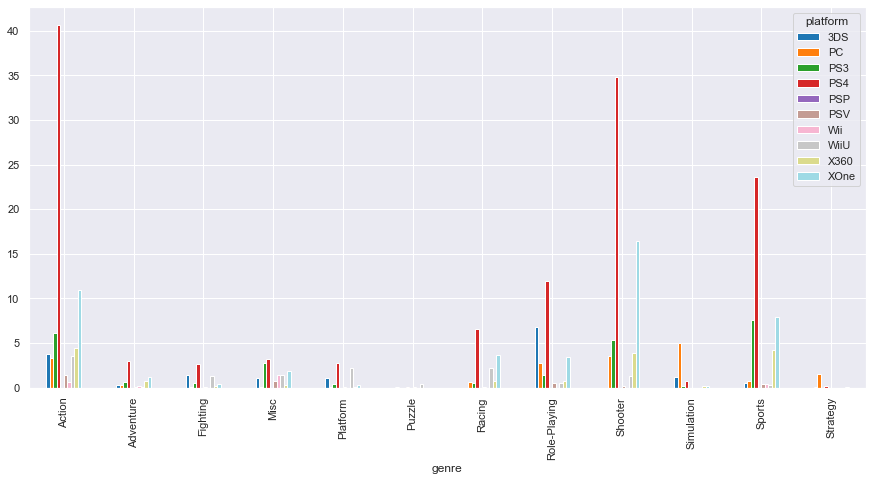

In [155]:
#Построим гистограмму объема продаж после 2014 года для каждой платформы по жанру игры  в Европе
df_new.pivot_table(index='genre', 
                   columns='platform', 
                   values = 'eu_sales', 
                   aggfunc = 'sum' ).plot(kind = 'bar', figsize = (15,7), cmap='tab20');

Самыми популярными жанрами в Европе являются: Action (на платформах PS4, XOne и PS3), Shooter (на платформах PS4, XOne и PS3), Sports (на платформах PS4, XOne и PS3), чуть менее поопулярны Role-Playing (на платформе PS4 и 3DS) Racing (на платформах PS4, XOne).

#### Япония

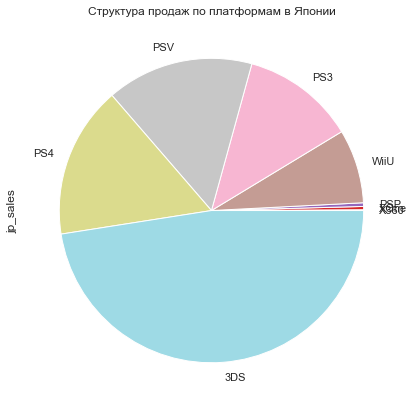

In [156]:
#Построим гистограмму количества проданных игр в Японии в зависимости от платформы после 2014 года
df_new.groupby('platform')['jp_sales'].sum().sort_values().plot(kind = 'pie',  
                                                             title = 'Структура продаж по платформам в Японии',
                                                             cmap='tab20', figsize = (7,7));

ТОП-5 платформ в Японии: 3DS, PS4, PSV, PS3, WiiU А вот лидирующие платформы в Японии отличаются от тех, что в Северной Америке и Европе

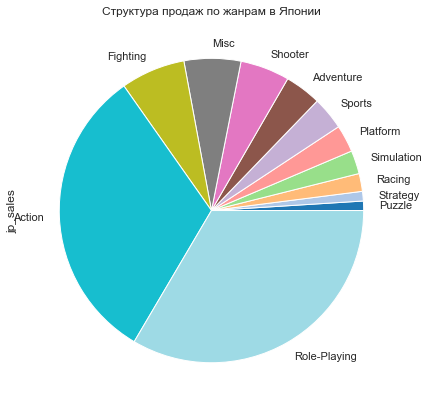

In [157]:
#Построим график количества проданных игр в Японии в зависимости от жанра после 2014 года
df_new.groupby('genre')['jp_sales'].sum().sort_values().plot(kind = 'pie', 
                                                             title = 'Структура продаж по жанрам в Японии',
                                                             cmap='tab20', figsize = (7,7));

ТОП-5 жанров в Японии: Role-Playing, Action, Fighting, Misc, Shooter. А вот топ жанров в Японии сильно отличается от Северной Америки и Европы

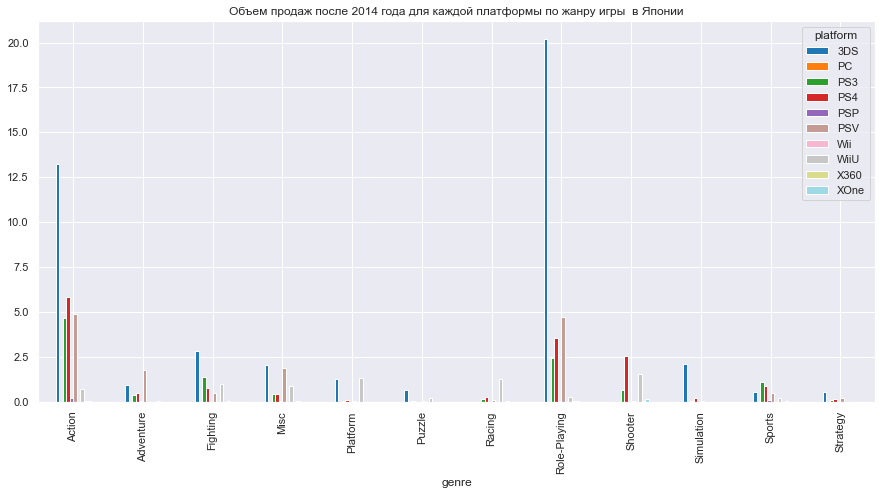

In [158]:
#Построим гистограмму объема продаж после 2014 года для каждой платформы по жанру игры  в Японии
df_new.pivot_table(index='genre', 
                   columns='platform', 
                   values = 'jp_sales', 
                   aggfunc = 'sum' ).plot(kind = 'bar', figsize = (15,7), cmap='tab20', title = 'Объем продаж после 2014 года для каждой платформы по жанру игры  в Японии');

В Японии распределение предпочтительных жанров сильно отличается от Северной Америки и Европы. Лидером является жанр Role-Playing (с большим отрывом на платформе 3DS, чуть меньше востребованы игры на платформах PSV, PS4); на втором месте по популярности жанр Action (на платформe 3DS). 

In [159]:
#Определим названия жанров, входящие в ТОП-5 после 2014 года
genre_top_5 = df_new.groupby('genre')['sale_sum'].sum().sort_values(ascending = False).head().reset_index()['genre']
genre_top_5 = list(genre_top_5)

In [160]:
#Сделаем срез по ТОП-5 платформ после 2014 года
df_genre_top_5 = df_new.loc[dfn['genre'].isin(genre_top_5)]

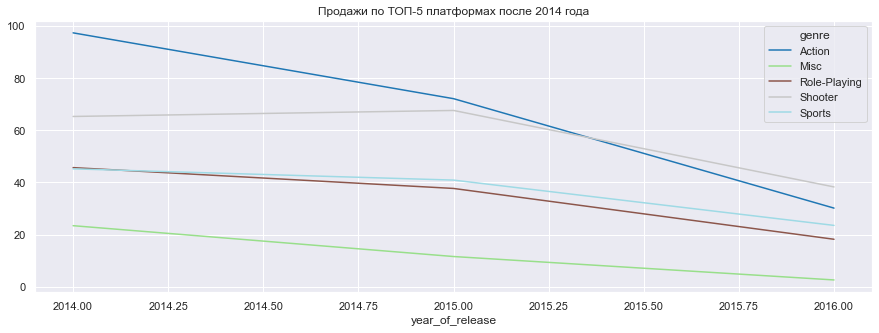

In [161]:
#Построим графики продаж по ТОП-5 платформах после 2014 года
df_genre_top_5.pivot_table(index = 'year_of_release', 
                   columns = 'genre', 
                   values = 'sale_sum', 
                   aggfunc = 'sum').plot(figsize = (15,5), title ='Продажи по ТОП-5 платформах после 2014 года', cmap='tab20');

При рассмотрении ТОП-5 жанров, можно сделать вывод о том, что общая тенденция объема продаж по всем жанрам схожая - объемы падают (за исключением жанра Shooter, который в 2015 году вырос по сравнению с предыдущим годом), темпы роста отличаются: наибольший спад наблюдается по жанру Action. В 2016 году - наибольший объем продаж был в жанре Shooter.

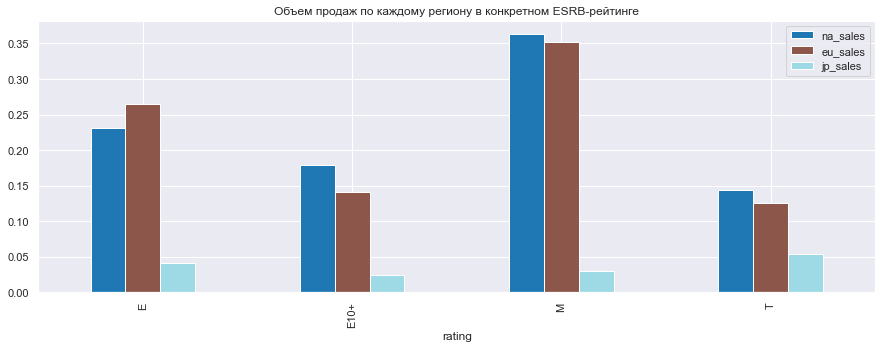

In [162]:
#Определим среднее значение объема продаж по каждому региону в конкретном ESRB-рейтинге
df_new.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().plot(kind = 'bar', title = 'Объем продаж по каждому региону в конкретном ESRB-рейтинге' ,cmap='tab20', grid = True,figsize = (15,5));

В целом, можно сказать, что ообщий объем продаж по типу рейтинга ESRB отличается в каждом регионе. Лидируют в Америке и Европе рейтинги М, Е, У10+. В Японии - Е, М и Т.

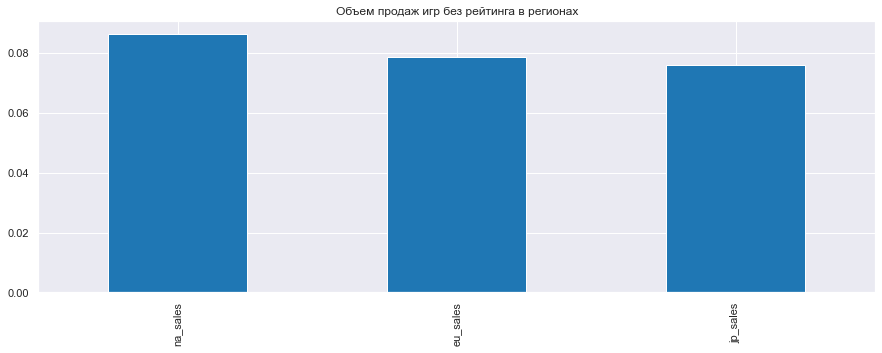

In [163]:
#Отфильтруем данные, где в столбце рейтинг нет данных и построим график
no_rating = df_new[df_new['rating'].isna()]
no_rating[['na_sales', 'eu_sales', 'jp_sales']].mean().plot(kind = 'bar', title = 'Объем продаж игр без рейтинга в регионах', cmap='tab20', grid = True, figsize = (15,5));

In [164]:
print(((no_rating['eu_sales'] - no_rating['na_sales']).sum() )/ no_rating['eu_sales'].sum() *100)
print(((no_rating['jp_sales'] - no_rating['eu_sales']).sum() )/ no_rating['jp_sales'].sum() *100)

-9.78795662522316
-3.602815791964531


Объем продаж игр с неизвестным рейтингом по регионам отличается не сильно: так, в Европе на 9,79% меньше, чем в Америке, а в Японии на 3,6% меньше, чем в Европе.

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_8652\174460630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['rating'] = df_new['rating'].fillna('unknow')


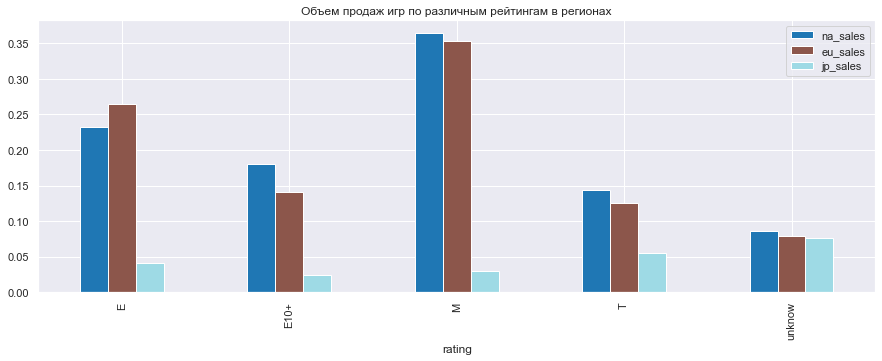

In [165]:
#В столбце рейтинг пропущенным значениямм заполним пропуски значением "unknow" и рассмотрим данные по регионам
df_new['rating'] = df_new['rating'].fillna('unknow')
df_new.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean().plot(kind = 'bar', title = 'Объем продаж игр по различным рейтингам в регионах', cmap='tab20', grid = True, figsize = (15,5));

Хорошо видно, что жители Японии предпочитают в большей степени игры с "неизвестным" рейтингом, по сравнению с Америкой и Европой

### Сравним гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC;

H_a: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC
alpha = 0.05

In [166]:
#Определим дисперсию пользовательских рейтингов для выборок после 2010 года по платформам PC и Xbox One 
pc = df_new.loc[(df_new['platform']=='PC') & (df_new['user_score'].notnull())]
xone = df_new.loc[(df_new['platform']=='XOne') & (df_new['user_score'].notnull())]

display(np.var(pc['user_score']))
display(np.var(xone['user_score']))

2.8773751258850098

1.8795461654663086

Так как дисперсии выборок разные, будем использовать параметр equal_var = False

In [167]:
#Определим среднее значение для имеющихся выборок
display(pc['user_score'].mean())
display(xone['user_score'].mean())

6.298359394073486

6.594542980194092

Среднее значение пользовательского рейтинга по платформе PC и Xbox One отличаются не сильно, проверим с помощью t-теста 

In [168]:
results = st.ttest_ind(
    pc['user_score'], 
    xone['user_score'],equal_var=False) 

alpha = .05 # уровень значимости

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.1160154559677266
Не получилось отвергнуть нулевую гипотезу


P-значение определяет вероятность случайного получения результата из пространства выборки. P-значение варьируется от 0 до 100%. Меньшее p-значение считается хорошим, поскольку оно подразумевает, что результат произошел не случайно.

H_0:Средние пользовательские рейтинги жанра Action = Средние пользовательские рейтинги жанра Sports;

H_a:Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports

In [169]:
#Определим дисперсию пользовательских рейтингов для выборок после 2010 года по жанрам Action и Sports
genre_action = df_new.loc[(df_new['genre']=='Action') & (df_new['user_score'].notnull())]
genre_sports = df_new.loc[(df_new['genre']=='Sports') & (df_new['user_score'].notnull())]

display(np.var(genre_action['user_score']))
display(np.var(genre_sports['user_score']))

1.8920830488204956

3.419837474822998

Так как дисперсии выборок разные, будем использовать параметр equal_var = False

In [170]:
#Определим среднее значение для имеющихся выборок
display(genre_action['user_score'].mean())
display(genre_sports['user_score'].mean())

6.760608196258545

5.225196361541748

Среднее значение пользовательского рейтинга по жанрам Action и Sports имеют более значимое отличие, чем в предыдущем случае, проверим нашу гипотезу с помощью t-теста

In [171]:
results = st.ttest_ind(
    genre_action['user_score'], 
    genre_sports['user_score'],equal_var=False) 

alpha = .05 # уровень значимости

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825639880196408e-14
Отвергаем нулевую гипотезу


Чем меньше p-value тем меньше вероятность того, что среднее выборки получено случайно. В данном случае, значение больше 

# Общий вывод

Исходные данные состоят из 16715 строк и 11 столбцов, в столбцах имеются пропущенные значения, также, при выборочном просмотре строк, было обнаружено, что в столбце User_Score есть значения "tbd". Данные имеют тип данных float64 и object. 
В столбце Name - 2 пропуска, в столбце Year_of_Release - 269, в столбце Genre - 2 пропуска, Critic_Score - 8578 пропусков, User_Score - 6701 (плюс значения "tbd"), в Rating – 6766.

Строки с пропущенным значением года релиза удалили, также как и с пропущенными значениями в столбцах name и genre.

Для экономии памяти, изменили тип данных в столбцах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score' на float32.

Явных строк-дубликатов не было обнаружено.

Больше всего игр приходится на 2008,2009 гг. Чуть меньше игр выпускалось в 2007 и 2009 годах. Самое большое количество продаж в Северной Америке, на втором месте - Европа, в Японии самый маленький. При этом, в Европе и Японии объем продаж более стабильный, чем в Северной Америке (после 2011 года наблюдается резкий спад продаж). В целом, прослеживается схожая тенденция между годом продаж и регионом, за исключением Японии в период с 2001 по 2005: в Америке и Европе рост, а в Японии спад.
Половина общего количества игр было выпущено в период 2002 - 2011 гг.

Больше всего продаж игр было для платформы PS2, также большое количество - на платформах X360, PS3, Wii, DS, PS. На остальных платформах сумма продаж существенно ниже. Таким образом, эти платформы являются лидерами, среди других платформ за период исследования с 1994 года.

Мы определили, что в среднем, жизненный цикл платформы составляет около 10 лет, таким образом, потенциально прибыльными платформами можно считать платформы, которые "живы" последние 5 лет (половина жизненного цикла), так как хоть пик популярности их прошел, они еще остаются востребованными. И так как это очень быстроменяющаяся сфера, для анализа оставим данные, начиная с 2014 года. Также необходимо отметить, что платформы PS4 и 3DS являются самымыми молодыми платформами, т.е. они еще не успели набрать популярность и обрести большой объем продаж.

Основными конкурентами в 2014 году были: PS4, XOne, PS3 и 3DS; в 2015и 2016 годах - PS4 и XOne; на смену одной платформы одного производителя приходит другая (PS3-PS4, X360-XOne). Платформы PS4 и XOne являются наиболее жизнеспособными платформами, жизненный цикл всех остальных подошел к концу. Платформа 3DS еще жива, но объем продаж гораздо ниже и ее жизненный цикл подходит также к концу.

Объем продаж игр на платформе Xone гораздо ниже, чем на платформе PS4, ввиду чего, можно говорить, что при выборе платформы, приоритет стоит отдать именно ей.

Наибольший разброс значений на платформе PS4. При этом, на данной платформе самое большое максимальное значение объема продаж. Также по объему продаж выделяются платформы: XOne, Wii, WiiU, X360. Медианное значение у XOne выше, чем у других платформ.На всех платформах медианное значение меньше среднего значения (медиана смещена вниз).Это говорит о том, что много игр, которые почти не принесли прибыль, а также есть отдельные игры, которые обеспечили большой объем продаж.

Наиболее сильная связь имеется между отзывами пользователей и отзывами критиков (коэффициент Пирсона равен 0.625309. Свзь между объемом продаж и отзывами критиков слабее (коэффициент равен 0.525723), зависимости между объемами продаж и отзывами пользователей нет. Это говорит о том, что вкусы и игровые предпочтения у жителей сильно отличаются. Это подтверждается коэффициентами корреляции между объемами продаж и отзывами пользователей по регионам. Отзывы критиков более объективные.
По платформе XOne: коэффициент Пирсона между отзывами пользователей и отзывами критиков меньше, но также прослеживается слабая связь (0.4410), также имеется слабая связь отзывами критиков и глобальными продажами (0.4287), продажами в америке (0.4011), продажами в Европе (0.3851). зависимости между отзывами критиков и продажами в Японии не наблюдается.
По платформе PS4: коэффициент Пирсона между отзывами пользователей и отзывами критиков составляет 0.5464, имеется слабая связь между отзывами критиков и общими продажами (0.4027), продажами в Америке (0.4116), продажами в Европе (0.3403), продажами в Японии (0.3790).

За анализируемый период больше всего игр было выпущено в жанрах: Action, Role-Playing, Adventure, Sports и Shooter, меньше всего - в жанрах Strategy и Puzzle. Несмотря на то, что по общим продажам, жанры Action, Role-Playing, Adventure лидируют, при рассмотрении медианных значений, мы установили, что в этих жанрах выпущено очень большое количество различных игр. А вот жанр Shooter имеет самую большую медиану значений и самый большой "ящик" - половина выпущенных игр в этом жанре пользуются популярностью. Интерес представляет также жанр Platform - несмотря на то, что он не является жанром-лидером, среди проданных копий, большая часть из выпущенных игр пользуюется популярностью у населения.

ТОП-5 Платформ в Северной Америке:  PS4, XOne, X360, 3DS, PS3.
ТОП-5 жанров в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc.
Самыми популярными жанрами в Северной Америке являются: Action(на платформах PS4 и XOne), Shooter (на платформах PS4 и XOne), Sports (на платформах PS4 и XOne), чуть менее поопулярны Role-Playing (на платформах 3DS, PS4 и XOne).

ТОП-5 платформ в Европе: PS4, XOne, PS3, PC, 3DS. Видим, что существенного отличия от Северной Америки нет.
ТОП-5 жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing. Топ существенно не отличается от жанров в Северной Америке.
Самыми популярными жанрами в Европе являются: Action (на платформах PS4, XOne и PS3), Shooter (на платформах PS4, XOne и PS3), Sports (на платформах PS4, XOne и PS3), чуть менее поопулярны Role-Playing (на платформе PS4 и 3DS) Racing (на платформах PS4, XOne).

ТОП-5 платформ в Японии: 3DS, PS4, PSV, PS3, WiiU А вот лидирующие платформы в Японии отличаются от тех, что в Северной Америке и Европе.
ТОП-5 жанров в Японии: Role-Playing, Action, Fighting, Misc, Shooter. А вот топ жанров в Японии сильно отличается от Северной Америки и Европы.
В Японии распределение предпочтительных жанров сильно отличается от Северной Америки и Европы. Лидером является жанр Role-Playing (с большим отрывом на платформе 3DS, чуть меньше востребованы игры на платформах PSV, PS4); на втором месте по популярности жанр Action (на платформe 3DS).

При рассмотрении ТОП-5 жанров(Role-Playing,  Action, Misc, Shooter, Sports), можно сделать вывод о том, что общая тенденция объема продаж по всем жанрам схожая - объемы падают (за исключением жанра Shooter, который в 2015 году вырос по сравнению с предыдущим годом), темпы роста отличаются: наибольший спад наблюдается по жанру Action. В 2016 году - наибольший объем продаж был в жанре Shooter.

В целом, можно сказать, что ообщий объем продаж по типу рейтинга ESRB отличается в каждом регионе. Лидируют в Америке и Европе рейтинги М, Е, У10+. В Японии - Е, М и Т.
Объем продаж игр с неизвестным рейтингом по регионам отличаетс я не сильно: так, в Европе на 9,79% меньше, чем в Америке, а в Японии на 3,6% меньше, чем в Европе.
В целом, жители Японии предпочитают в большей степени игры с "неизвестным" рейтингом, по сравнению с Америкой и Европой.

Сравнение гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC;

H_a: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC

alpha = 0.05

Дисперсия для выборки по платформе PC равна 2.4438941, по платформе Xbox One равна 1.8965188.

Среднее значение пользовательского рейтинга по платформе PC и Xbox One отличаются не сильно (6.5181828 И 6.521428)
Не получилось отвергнуть нулевую гипотезу.

P-значение определяет вероятность случайного получения результата из пространства выборки. P-значение варьируется от 0 до 100%. Меньшее p-значение считается хорошим, поскольку оно подразумевает, что результат произошел не случайно.

Сравнение гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

H_0: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC;

H_a: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC

alpha = 0.05. 

Определили дисперсияю для жанров Action и Sports (1.8477725 и 2.8266325). Среднее значение пользовательского рейтинга по жанрам Action и Sports (6.7819 и 5.9015875)  имеют более значимое отличие, чем в предыдущем случае. 

Отвергаем нулевую гипотезу
Чем меньше p-value тем меньше вероятность того, что среднее выборки получено случайно. В данном случае, значение больше

<b>Рекомендации заказчику</b>: если не привязываться к региону продаж, то стоит обратить внимание на закупку следующих игр: 'Super Mario Maker LittleBigPlanet 3 Kirby: Triple Deluxe Donkey Kong Country: Tropical Freeze Rayman Legends', 'Grand Theft Auto V Uncharted: The Nathan Drake Collection Watch Dogs Batman: Arkham Knight Metal Gear Solid V: The Phantom Pain', "Grand Theft Auto V Batman: Arkham Knight Metal Gear Solid V: The Phantom Pain LEGO Jurassic World Assassin's Creed Syndicate", "Far Cry 4 Battlefield 1 Tom Clancy's The Division Destiny Uncharted 4: A Thief's End", 'Halo 5: Guardians Gears of War: Ultimate Edition Halo: The Master Chief Collection Titanfall Battlefield 1', 'NBA 2K16 NBA 2K15 Madden NFL 15 NBA 2K17 WWE 2K16', 'Fallout 4 The Witcher 3: Wild Hunt The Elder Scrolls Online Dragon Age: Inquisition Dark Souls III', 'NBA 2K16 NBA 2K15 Madden NFL 15 NBA 2K17 Madden NFL 16', 'LittleBigPlanet 3 Rayman Legends Tearaway Unfolded Mega Man Legacy Collection Shovel Knight', 'Fallout 4 The Witcher 3: Wild Hunt Monster Hunter 4 Ultimate Dragon Age: Inquisition Dark Souls II'.
Если концентрироваться только на рынке Японии, то следует обратить внимание на жанры Role-Playing (на платформе 3DS, PSV, PS4) и жанре Action (на платформe 3DS).